<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

**EDA**  
  
El número de datos es 371528 y el de columnas es 20.
**Duplicados:**  
Solo se han identificado 4 filas duplicadas. Entonces, como cada fila representa un coche concreto (con su kilomeraje etc). Opto por eliminarlos

**Nulos:**  
Observamos como las columnas con más nulos son vehicleType (36%), notRepairedDamage	(19%) además de gearbox, model y fuelType.

**Datos de interés:**  
- diferencias en grupo test y de control  
- Enorme mayoría de vendedores privados  
- Enorme mayoría de ofertas de venta con cantidad ínfima de ofertas de compra  
- Mayoría de coches pequeños y minoría de coupe    
- Mayoría de manuales frente a automáticos    
- Hay una categoría de modelo que corresponde a otros modelos (andere).  
- Mayoría de petrol y diesel 
- Mayoría de Volkswagen 
  
Hay datos atípicos en la potencia, en año de registro y en precio

**Pasos a seguir:**  
  

- Dropeo los duplicados y la columna de número de fotos  
- Cambio a datetime las fechas




1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   

In [2]:
df_autos=pd.read_csv("../datos/autorenew.csv")

In [3]:
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
f.exploracion_dataframe(df_autos, "price")

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5


La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305


La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16


Me cargo los duplicados y la columna llena de 0 que no aporta nada

In [5]:
df_autos.drop_duplicates(inplace=True)
df_autos.reset_index(inplace=True, drop=True)

In [6]:
df_autos.drop(columns="nrOfPictures", inplace=True)

Pasamos a datetime las fechas para que no las incluya en el df de categorías

In [7]:
df_autos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371524.0,17295.302511,3.587973e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371524.0,2004.578033,9.286710e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371524.0,113.967402,1.895175e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371524.0,125618.842928,4.011214e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371524.0,5.734451,3.712423e+00,0.0,3.0,6.0,9.0,1.200000e+01
postalCode,371524.0,50820.494270,2.579909e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


In [8]:
df_autos["kilometer"].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

In [9]:
df_autos["dateCreated"]= pd.to_datetime(df_autos["dateCreated"])
df_autos["dateCrawled"]= pd.to_datetime(df_autos["dateCrawled"])
df_autos["lastSeen"]= pd.to_datetime(df_autos["lastSeen"])

In [10]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371524 entries, 0 to 371523
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          237761 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              351315 non-null  object        
 9   powerCV              371524 non-null  float64       
 10  model                351040 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType      

In [11]:
df_autos["yearCreated"]=df_autos["dateCreated"].dt.year
df_autos["monthCreated"]=df_autos["dateCreated"].dt.month

In [12]:
df_autos.drop(columns="dateCreated", inplace=True)

In [13]:
df_autos["monthCreated"]=df_autos["monthCreated"].astype("category")
df_autos["yearCreated"]=df_autos["yearCreated"].astype("category")

Pasamos kilometraje a categoría

In [14]:
df_autos["kilometer"]=df_autos["kilometer"].astype("O")
df_autos["postalCode"]=df_autos["postalCode"].astype("O")

In [15]:
# f.relacion_dependiente_categoricas(df_categoricas,"price")  

Ahora sustituimos los 0 por nulos en las columnas de month y power

In [16]:
df_autos["powerCV"].replace(0, np.nan, inplace=True)
df_autos["monthOfRegistration"].replace(0, "desconocido", inplace=True)
df_autos["monthOfRegistration"]=df_autos["monthOfRegistration"].astype("category")

In [17]:
df_autos.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,371524,2016-03-21 13:30:30.336384512,2016-03-05 14:06:22,2016-03-13 12:51:46.500000,2016-03-21 18:36:22,2016-03-29 14:49:31.249999872,2016-04-07 14:36:58,NaN
price,371524.0,17295.302511,0.0,1150.0,2950.0,7200.0,2147483647.0,3587973.058862
yearOfRegistration,371524.0,2004.578033,1000.0,1999.0,2003.0,2008.0,9999.0,92.867097
powerCV,330704.0,128.034814,1.0,79.0,114.0,148.0,19726.0,196.3393
lastSeen,371524,2016-03-30 03:37:56.511738112,2016-03-05 14:15:08,2016-03-23 11:36:06.750000128,2016-04-03 23:17:18,2016-04-06 10:45:02,2016-04-07 14:58:51,NaN


In [18]:
df_autos.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                 40820
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
postalCode                  0
lastSeen                    0
yearCreated                 0
monthCreated                0
dtype: int64

COMO YA HE APRENDIDO QUE SELLER Y OFFERTYPE TIENE SENTIDO DROPEARLAS, PUES LAS DROPEO


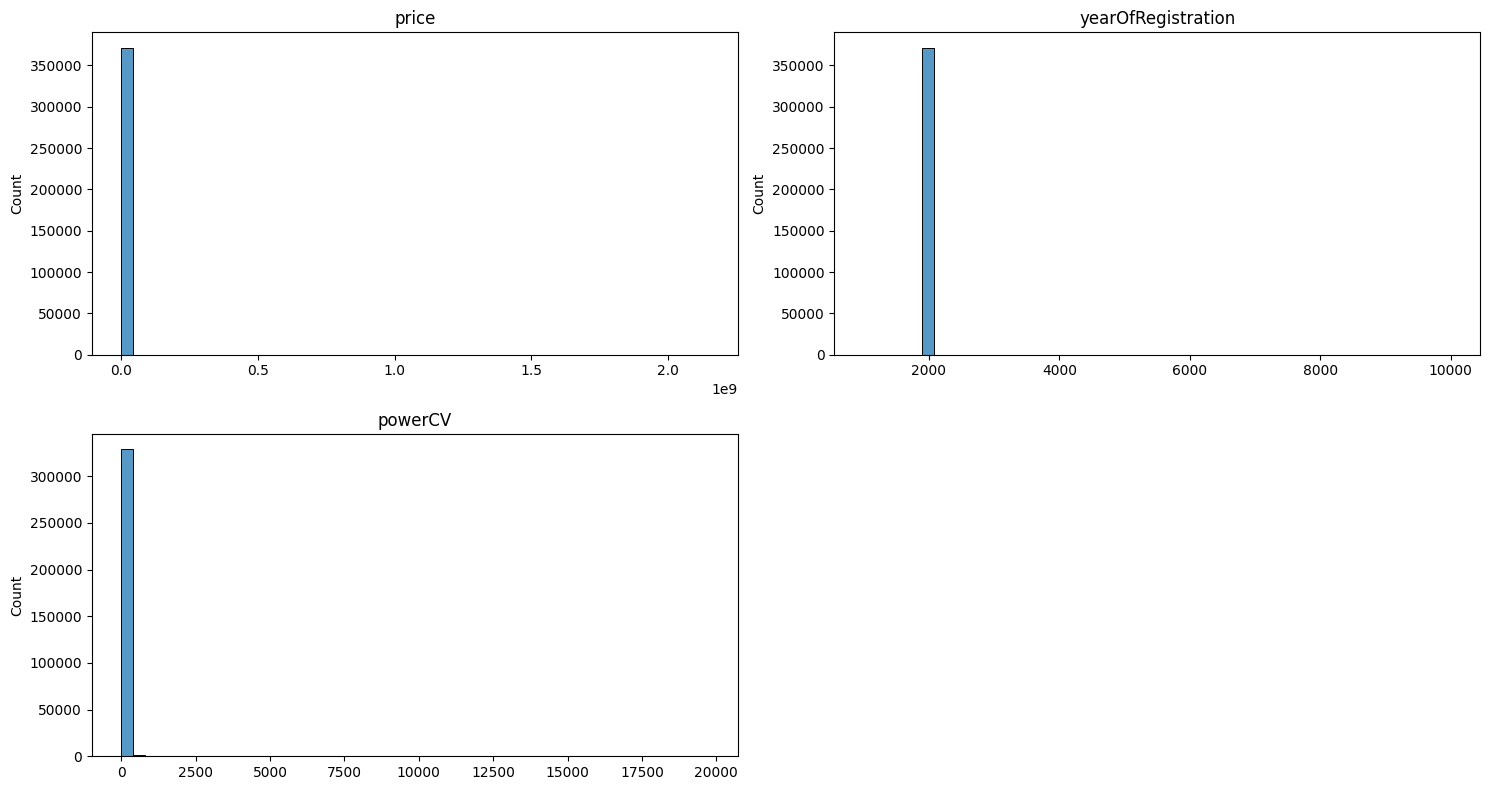

In [19]:
df_numericas, df_categoricas=f.separar_dataframe(df_autos)
f.plot_numericas(df_numericas, (15,8))

Observamos las distribuciones de las variables numéricas

In [20]:
df_autos.drop(columns="postalCode", inplace=True)
df_autos.drop(columns="name", inplace=True)

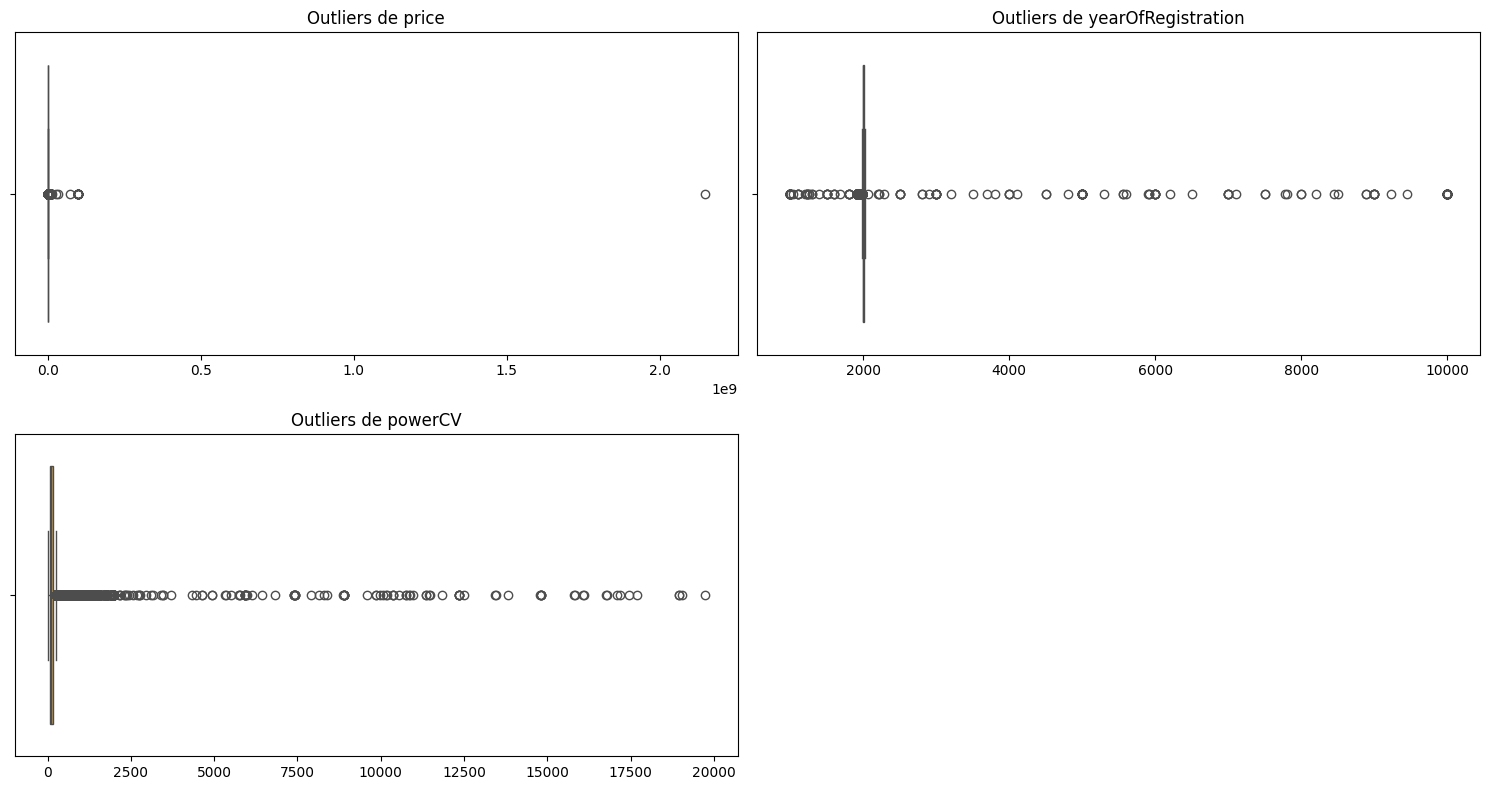

In [21]:
f.detectar_outliers(df_autos)

Observamos los Outliers y utilizar la lógica para distinguir entre outlier y dato erroneo

VAMOS A PASAR A NAN LOS VALORES ERRONEOS CON EL RIESGO DE ELIMINAR OUTLIERS (COMO LUEGO USAREMOS UN MODELO ITERATIVO NO ES TAN GRAVE)

YearOfRegistration además de transformar a desconocidos, creamos otras categorias donde agrupamos los años

In [22]:
df_year_ilog= (df_autos["yearOfRegistration"] <1900) | (df_autos["yearOfRegistration"] >=2025)
df_autos.loc[df_autos[df_year_ilog].index, "yearOfRegistration"] = "desconocido"

In [23]:
lista_general=[]
lista_clasico=[]
lista_retro=[]
lista_actual=[]
lista_moderno=[]
for clasico in range(1900,1961):
    lista_clasico.append(clasico)

for retro in range(1961,1991):
    lista_retro.append(retro)

for moderno in range(1991,2011):
    lista_moderno.append(moderno)

for actual in range(2011,2025):
    lista_actual.append(actual)        

dicc= { "clasico": lista_clasico,
        "retro": lista_retro,
        "moderno": lista_moderno,
        "actual": lista_actual}

In [24]:
new_dicc = dict()
for k,v in dicc.items():
    for val in v:
        new_dicc[val] = k
new_dicc["desconocido"] = "desconocido"

In [25]:
df_autos["yearOfRegistration"] = df_autos["yearOfRegistration"].map(new_dicc)

<Axes: xlabel='yearOfRegistration', ylabel='count'>

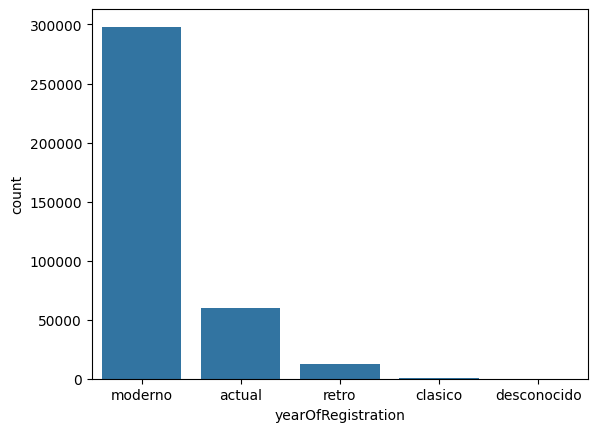

In [26]:
sns.countplot(data = df_autos, x = "yearOfRegistration")

Potencia

In [27]:
df_pot_ilog= (df_autos["powerCV"] <10) | (df_autos["powerCV"] >=500)
df_autos.loc[df_autos[df_pot_ilog].index, "powerCV"] = np.nan

In [28]:
df_autos[df_autos["powerCV"]> 350].head()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,yearCreated,monthCreated
640,2016-03-06 12:38:01,private,offer,41900,test,NaN,actual,automatic,451.0,c_klasse,60000,7,petrol,mercedes_benz,no,2016-03-21 11:46:17,2016,3
669,2016-03-28 19:40:52,private,offer,21000,control,coupe,moderno,manually,403.0,3er,150000,4,petrol,bmw,no,2016-04-07 01:45:48,2016,3
996,2016-03-25 12:42:09,private,offer,139997,test,coupe,moderno,manually,429.0,911,20000,3,petrol,porsche,no,2016-04-06 13:45:07,2016,3
1903,2016-03-20 13:51:55,private,offer,34899,test,coupe,moderno,manually,498.0,NaN,20000,7,petrol,sonstige_autos,no,2016-04-06 15:45:29,2016,3
2365,2016-03-09 14:45:05,private,offer,6500,test,convertible,retro,automatic,355.0,NaN,150000,6,petrol,sonstige_autos,NaN,2016-04-06 08:46:00,2016,3


Precio

Probamos a cambiar los límites de 0 a 50 y de 35000 a 500000 lo convierto a otro dataframe de lujo 

In [29]:
df_autos[df_autos["price"]< 50].head()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,yearCreated,monthCreated
7,2016-03-21 18:54:38,private,offer,0,test,NaN,retro,manually,49.0,andere,40000,7,petrol,volkswagen,no,2016-03-25 16:47:58,2016,3
40,2016-03-26 22:06:17,private,offer,0,test,NaN,retro,NaN,NaN,corsa,150000,1,petrol,opel,NaN,2016-03-27 17:43:34,2016,3
60,2016-03-29 15:48:15,private,offer,1,control,suv,moderno,manually,282.0,NaN,150000,11,NaN,sonstige_autos,NaN,2016-04-06 01:44:38,2016,3
91,2016-03-28 09:37:01,private,offer,1,control,NaN,moderno,manually,111.0,e_klasse,150000,4,diesel,mercedes_benz,no,2016-04-06 12:15:54,2016,3
115,2016-03-19 18:40:12,private,offer,0,test,NaN,actual,manually,NaN,golf,5000,12,petrol,volkswagen,NaN,2016-04-01 08:47:05,2016,3


In [30]:
df_autos[df_autos["price"]> 100000].head()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,yearCreated,monthCreated
996,2016-03-25 12:42:09,private,offer,139997,test,coupe,moderno,manually,429.0,911,20000,3,petrol,porsche,no,2016-04-06 13:45:07,2016,3
1846,2016-03-10 22:47:05,private,offer,579000,control,coupe,retro,manually,273.0,andere,20000,12,petrol,bmw,no,2016-03-23 10:45:27,2016,3
2735,2016-03-16 11:41:35,private,offer,120000,test,convertible,actual,automatic,NaN,NaN,20000,7,petrol,sonstige_autos,no,2016-03-21 10:48:23,2016,3
4359,2016-03-27 23:48:22,private,offer,185000,test,convertible,retro,automatic,168.0,sl,5000,7,petrol,mercedes_benz,no,2016-04-06 02:15:21,2016,3
5907,2016-03-21 20:48:56,private,offer,119000,control,convertible,retro,manually,138.0,911,150000,4,petrol,porsche,no,2016-03-27 06:44:33,2016,3


In [31]:
# df_pre_ilog= (df_autos["price"] <0) | (df_autos["price"] >=50000000)
# df_autos.loc[df_autos[df_pre_ilog].index, "price"] = np.nan
df_autos=df_autos[df_autos["price"] < 100000]

df_autos=df_autos[df_autos["price"]> 50]

Año subido y Mes subido no lo tocamos porque tiene sentido.

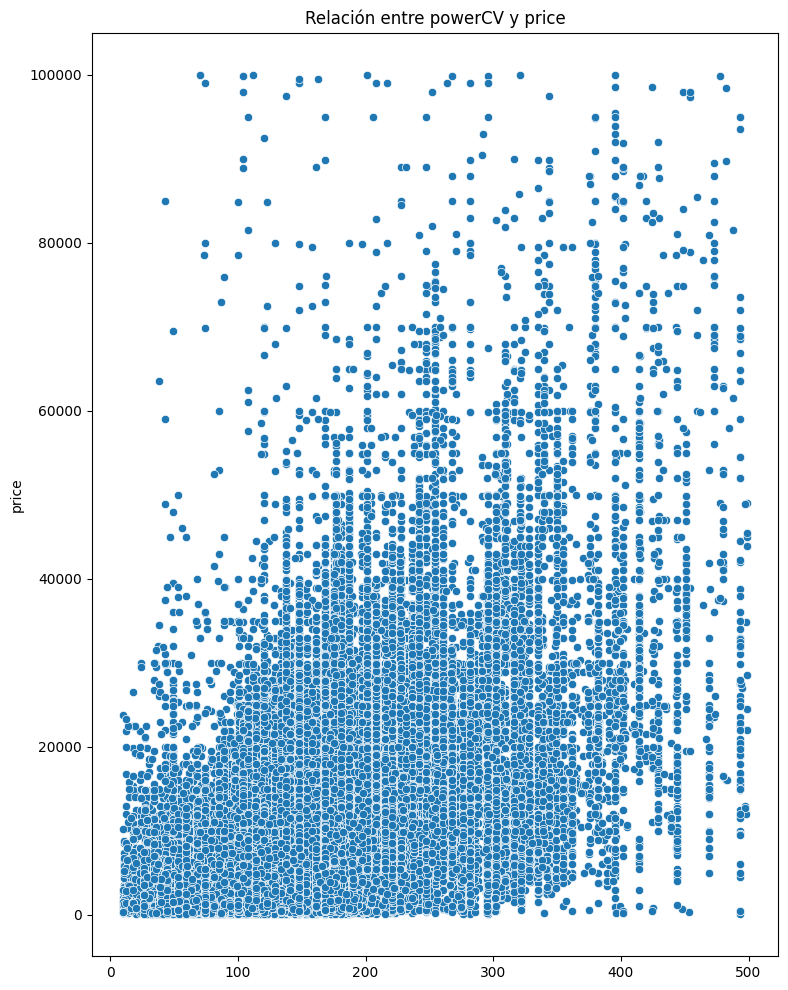

In [32]:
f.relacion_dependiente_numericas(df_autos, "price", (15,10))

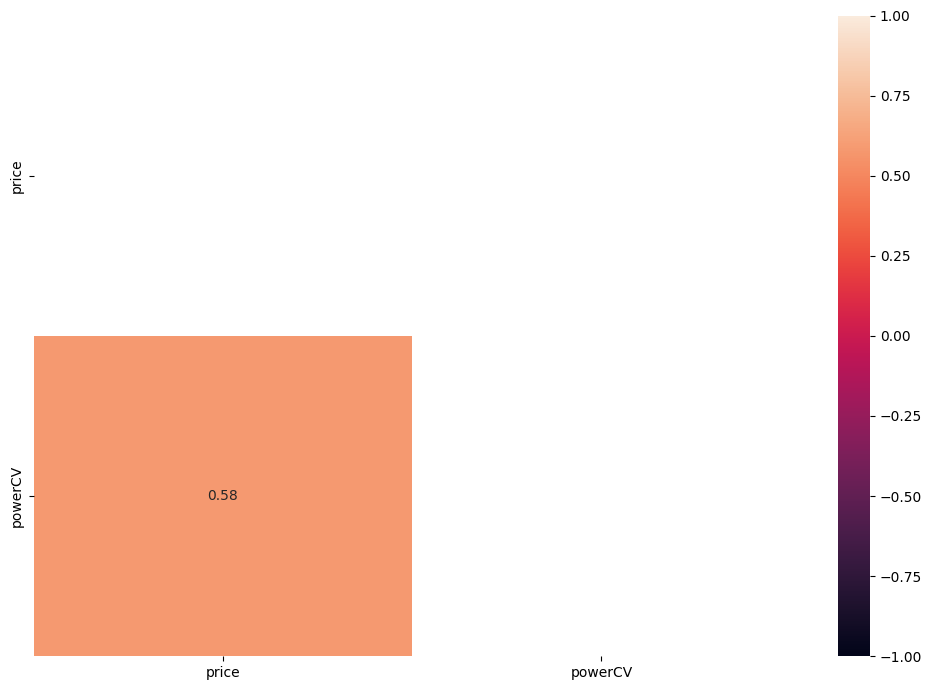

In [33]:
f.matriz_correlacion(df_autos)

Observamos que no hay casi nada de correlación entre las distintas variables numéricas salvo en precio con potencia que es moderada

Ahora gestionamos los nulos de las categóricas

In [34]:
df_autos.isna().sum()

dateCrawled                 0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            126712
yearOfRegistration          0
gearbox                 16851
powerCV                 36798
model                   17779
kilometer                   0
monthOfRegistration         0
fuelType                28999
brand                       0
notRepairedDamage       65527
lastSeen                    0
yearCreated                 0
monthCreated                0
dtype: int64

In [35]:
df_autos["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [36]:
df_autos["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

Tipo vehículo

In [37]:
df_autos["vehicleType"].fillna("other", inplace=True)

Gearbox

In [38]:
df_autos["gearbox"].fillna("desconocido", inplace=True)

Model

In [39]:
df_autos["model"].fillna("desconocido", inplace=True)

FuelType

In [40]:
df_autos["fuelType"].fillna("other", inplace=True)

Not Repaired Damaged

In [41]:
df_autos["notRepairedDamage"].fillna("desconocido", inplace=True)

2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

Hay que imputar knn con numéricas pero sacando la variable dependiente de numéricas

In [143]:
df_autos.reset_index(drop=True, inplace=True)

In [144]:
df_numericas=df_autos.select_dtypes(include=np.number)
df_numericas.drop(columns="price", inplace=True)
imputer_knn= KNNImputer(n_neighbors=5)   #por defecto siempre lo calcula en base a la media y no se puede cambiar
knn_imputado= imputer_knn.fit_transform(df_numericas)    #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
df_knn=df_autos.copy()
df_num_sin_nulos=pd.DataFrame(knn_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
df_knn[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

KeyboardInterrupt: 

In [ ]:
df_knn.isna().sum()

dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
lastSeen               0
yearCreated            0
monthCreated           0
dtype: int64

In [ ]:
df_knn.shape

(360644, 18)

In [ ]:
df_numericas=df_autos.select_dtypes(include=np.number)
df_numericas.drop(columns="price", inplace=True)
imputer_iterative= IterativeImputer()       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
                                            #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
                                            #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
iterative_imputado=imputer_iterative.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
df_iterativo=df_autos.copy()
df_num_sin_nulos=pd.DataFrame(iterative_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
df_iterativo[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [ ]:
df_iterativo.isna().sum()

dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
lastSeen               0
yearCreated            0
monthCreated           0
dtype: int64

In [ ]:
df_iterativo.shape

(360644, 18)

In [ ]:
df_numericas=df_autos.select_dtypes(include=np.number)
df_numericas.drop(columns="price", inplace=True)
imputer_iterativerand= IterativeImputer(estimator=RandomForestRegressor())       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
                                            #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
                                            #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
iterative_imputadorand=imputer_iterativerand.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
df_rand=df_autos.copy()
df_num_sin_nulosrand=pd.DataFrame(iterative_imputadorand, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
df_rand[df_numericas.columns]= df_num_sin_nulosrand    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [ ]:
df_rand.isna().sum()

dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
lastSeen               0
yearCreated            0
monthCreated           0
dtype: int64

In [ ]:
df_rand.shape

(360644, 18)

In [ ]:
df_autos.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,360644,2016-03-21 13:28:17.374391552,2016-03-05 14:06:22,2016-03-13 12:50:44,2016-03-21 18:06:17,2016-03-29 14:50:29.249999872,2016-04-07 14:36:58,NaN
price,360644.0,5913.81822,1.0,1250.0,3000.0,7490.0,488997.0,9220.26578
powerCV,323325.0,124.84309,10.0,79.0,114.0,148.0,1485.0,64.975905
lastSeen,360644,2016-03-30 04:42:15.046572288,2016-03-05 14:15:08,2016-03-23 12:50:24,2016-04-04 02:44:43.500000,2016-04-06 10:45:57,2016-04-07 14:58:51,NaN


In [ ]:
df_autos.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,360644,2016-03-21 13:28:17.374391552,2016-03-05 14:06:22,2016-03-13 12:50:44,2016-03-21 18:06:17,2016-03-29 14:50:29.249999872,2016-04-07 14:36:58,NaN
price,360644.0,5913.81822,1.0,1250.0,3000.0,7490.0,488997.0,9220.26578
powerCV,323325.0,124.84309,10.0,79.0,114.0,148.0,1485.0,64.975905
lastSeen,360644,2016-03-30 04:42:15.046572288,2016-03-05 14:15:08,2016-03-23 12:50:24,2016-04-04 02:44:43.500000,2016-04-06 10:45:57,2016-04-07 14:58:51,NaN


In [ ]:
df_knn.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,360644,2016-03-21 13:28:17.374391552,2016-03-05 14:06:22,2016-03-13 12:50:44,2016-03-21 18:06:17,2016-03-29 14:50:29.249999872,2016-04-07 14:36:58,NaN
price,360644.0,5913.81822,1.0,1250.0,3000.0,7490.0,488997.0,9220.26578
powerCV,360644.0,124.84309,10.0,85.0,120.0,148.0,1485.0,61.522298
lastSeen,360644,2016-03-30 04:42:15.046572288,2016-03-05 14:15:08,2016-03-23 12:50:24,2016-04-04 02:44:43.500000,2016-04-06 10:45:57,2016-04-07 14:58:51,NaN


In [ ]:
df_iterativo.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,360644,2016-03-21 13:28:17.374391552,2016-03-05 14:06:22,2016-03-13 12:50:44,2016-03-21 18:06:17,2016-03-29 14:50:29.249999872,2016-04-07 14:36:58,NaN
price,360644.0,5913.81822,1.0,1250.0,3000.0,7490.0,488997.0,9220.26578
powerCV,360644.0,124.84309,10.0,85.0,120.0,148.0,1485.0,61.522298
lastSeen,360644,2016-03-30 04:42:15.046572288,2016-03-05 14:15:08,2016-03-23 12:50:24,2016-04-04 02:44:43.500000,2016-04-06 10:45:57,2016-04-07 14:58:51,NaN


In [ ]:
df_rand.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,360644,2016-03-21 13:28:17.374391552,2016-03-05 14:06:22,2016-03-13 12:50:44,2016-03-21 18:06:17,2016-03-29 14:50:29.249999872,2016-04-07 14:36:58,NaN
price,360644.0,5913.81822,1.0,1250.0,3000.0,7490.0,488997.0,9220.26578
powerCV,360644.0,124.84309,10.0,85.0,120.0,148.0,1485.0,61.522298
lastSeen,360644,2016-03-30 04:42:15.046572288,2016-03-05 14:15:08,2016-03-23 12:50:24,2016-04-04 02:44:43.500000,2016-04-06 10:45:57,2016-04-07 14:58:51,NaN


Aunque en un primer momento pareciera que la opción del iterativo podía ser la óptima dado que las diferencias en las medias con respecto al data frame original son las menores. Al analizar la media del precio se observa como su diferencia se dispara (24 unidades de diferencia frente a 3,9 del KNN). Además, si nos fijamos en las medianas que es donde no habría tanta dispersión, observamos que la opción de imputación mediante KNN obtiene mejores resultados pues mantiene las diferencias por debajo de las diferencias del modelo de imputación iterativo.

Por ello, nos quedamos con la imputación de nulos de KNN porque es la que menos distorsión genera.

TRAS HACER LOS ARREGLOS PERTINENTES, NOS DA IGUAL QUEDARNOS CON EL MODELO ITERATIVO O EL KNN

In [ ]:
df_knn.to_csv("datos4\datos_sin_nulos.csv")